In [ ]:
# Mount the Google drive for access to files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
import os
import glob
import re
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
incerto_dir = '/content/drive/MyDrive/incerto-autore'
new_poems_dir = os.path.join(incerto_dir, 'data', 'poems')
figures_dir = os.path.join(incerto_dir, 'figures')
output_dir = os.path.join(incerto_dir, 'output')

In [ ]:

predictions_dir = os.path.join(incerto_dir, 'output','predictions')

In [ ]:
predictions_binary = pd.concat(map(pd.read_csv, glob.glob(os.path.join(predictions_dir, 'predictions_binary*.csv'))), ignore_index=True)
predictions_binary['group_label'] = [x.split('_')[0] for x in predictions_binary.label]
predictions_binary['type'] = 'Binary'
new_pred_binary = predictions_binary.groupby(['group_label', 'author', 'type'], as_index=False).mean().rename(columns={'group_label': 'label'})
new_pred_binary[:3]

,label,author,type,prediction
0,UA1,CelioMagno,Binary,0.011328
1,UA1,Franco,Binary,0.700658
2,UA1,Petrarca,Binary,0.197960


In [ ]:
predictions_multi = pd.concat(map(pd.read_csv, glob.glob(os.path.join(predictions_dir, 'predictions_multi*.csv'))), ignore_index=True)
predictions_multi['group_label'] = [x.split('_')[0] for x in predictions_multi.label]
predictions_multi['type'] = 'Multiclass'
new_pred_multi = predictions_multi.groupby(['group_label', 'author', 'type'], as_index=False).mean().rename(columns={'group_label': 'label'})
new_pred_multi[:3]

,label,author,type,prediction
0,UA1,AntonGiacomoCorso,Multiclass,0.044802
1,UA1,CelioMagno,Multiclass,0.039563
2,UA1,DomenicoVenier,Multiclass,0.011088


In [ ]:
new_pred = pd.concat([new_pred_multi, new_pred_binary])
new_pred.sort_values(['label', 'author'])
new_pred[:3]

,label,author,type,prediction
0,UA1,AntonGiacomoCorso,Multiclass,0.044802
1,UA1,CelioMagno,Multiclass,0.039563
2,UA1,DomenicoVenier,Multiclass,0.011088


## Scatterplots

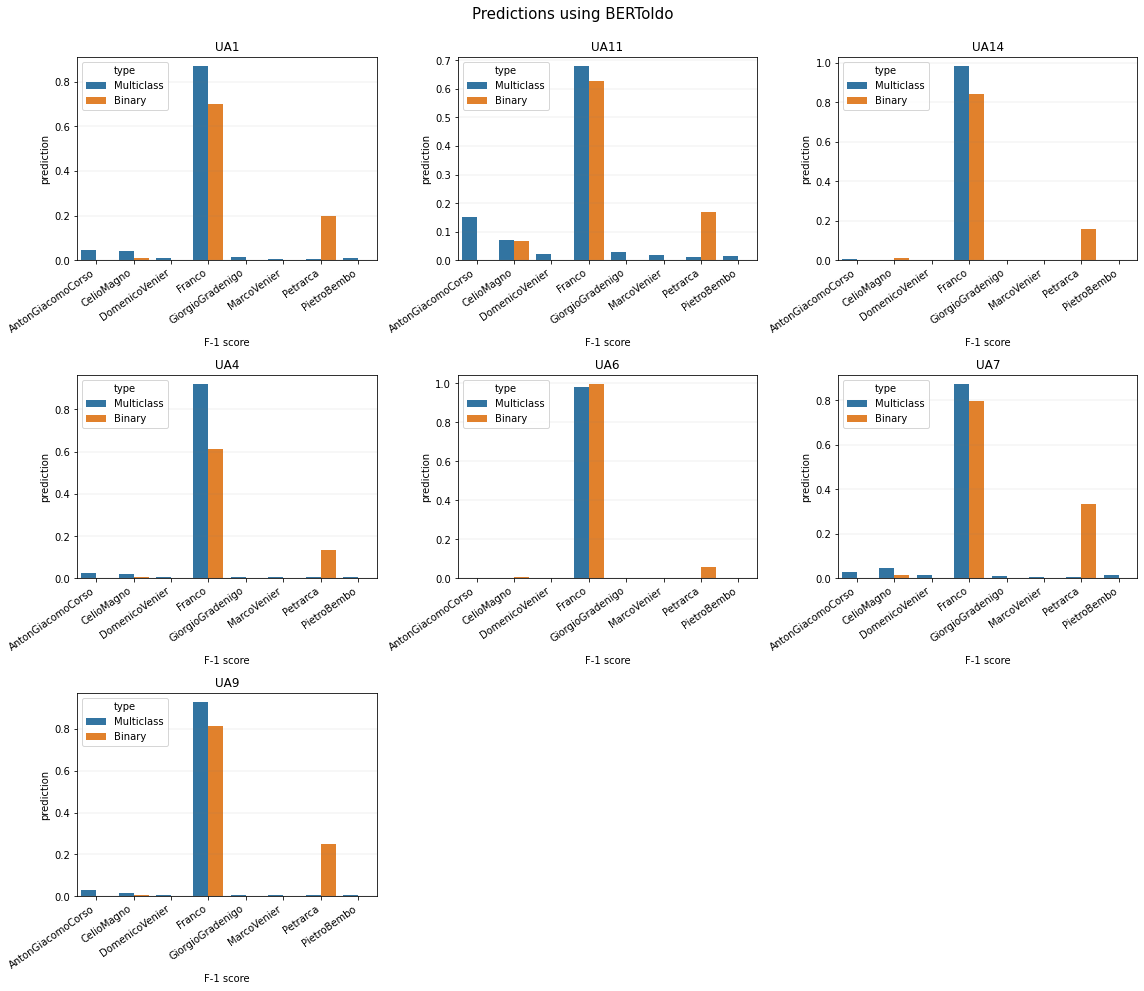

In [ ]:
# for author in new_pred_df.author.unique():
_figure = plt.figure(figsize = (16,14), tight_layout=0.5)
plt.suptitle(f'Predictions using BERToldo\n', size=15)
pos = 1
for label in new_pred.label.unique():
    _figure.add_subplot(3,3,pos) 
    cond = (new_pred['label'] == label)
    df = new_pred.loc[cond].copy()
    ax = sns.barplot(data=df, x='author', y='prediction', hue='type')
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.xticks(rotation=35, ha='right')
    #ax.set_xticklabels(new_pred.author.unique(), rotation=30, ha='right')
    ax.set_xlabel(f'F-1 score')
    ax.set_title(f'{label}')
    pos += 1

In [ ]:
# for author in new_pred_df.author.unique():
_figure = plt.figure(figsize = (4*4,4*2), tight_layout=0.5)
#plt.suptitle(f'{author} classifier\n', size=15)
pos = 1
for label in new_pred_bin.label.unique():
    _figure.add_subplot(2,4,pos) 
    cond = (new_pred_bin['label'] == label)
    df = new_pred_bin.loc[cond].copy()
    ax = sns.scatterplot(data=df, x='author', y='prediction')
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.tick_params(axis='x', labelrotation=30)
    ax.set_xlabel(f'F-1 score')
    ax.set_title(f'{label}')
    pos += 1

## Histograms

In [ ]:
def make_figures(author, ddf, x, hue, typ):

  _figure = plt.figure(figsize = (3*4,3*2), tight_layout=0.5)
  plt.suptitle(f'{author} {typ} classifier\n', size=15)
  pos = 1
  
  for group_label in ddf.group_label.unique():
    _figure.add_subplot(2,4,pos) 
    cond = (pred_df['group_label'] == group_label) & (pred_df['author'] == author) & (pred_df['type'] ==  typ)
    df = pred_df.loc[cond].copy()
    df.sort_values(['classifier'], inplace=True)
    ax = sns.histplot(x=x, data=df, hue=hue)
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.tick_params(axis='x', labelrotation=30)
    ax.set_xlabel(f'{x[0].upper()}{x[1:]}')
    ax.set_title(f'{group_label}')
    pos += 1

  return _figure

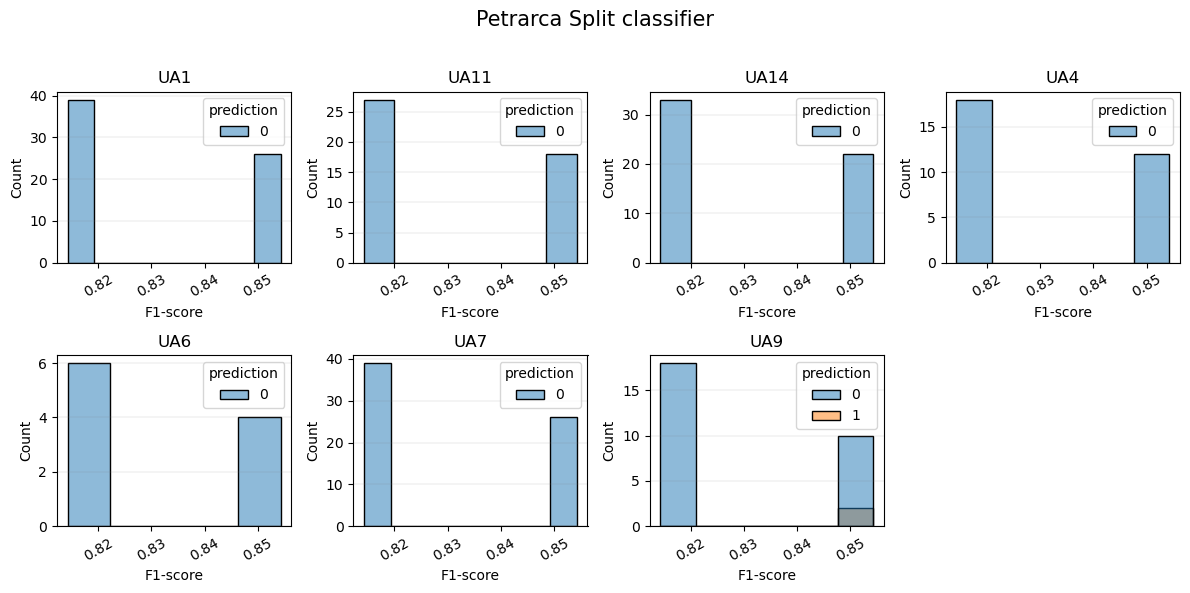

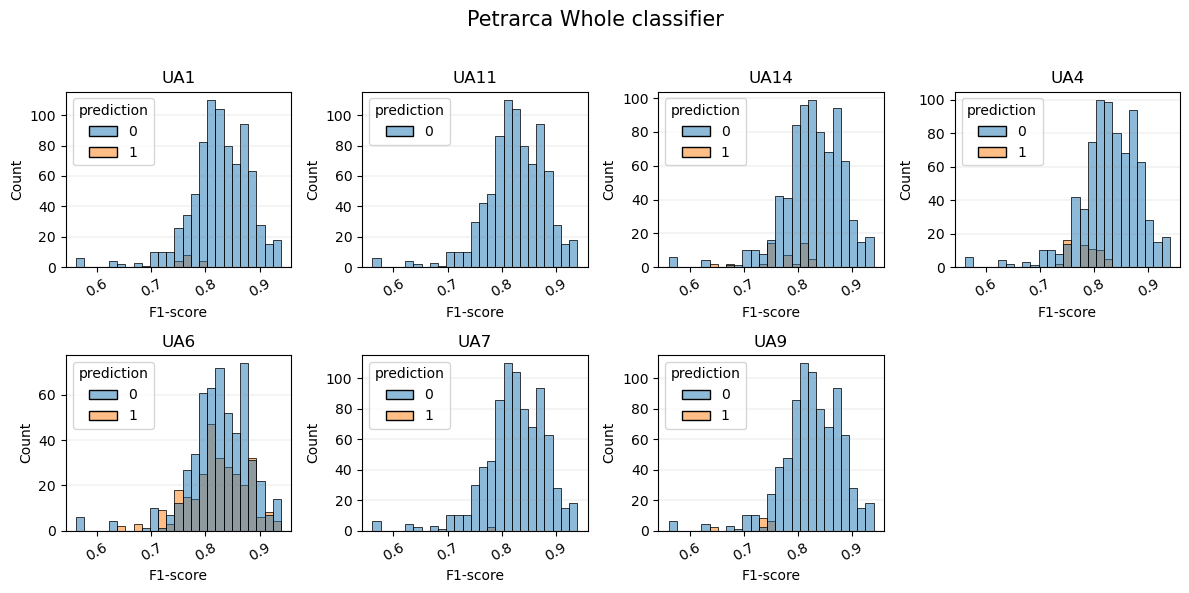

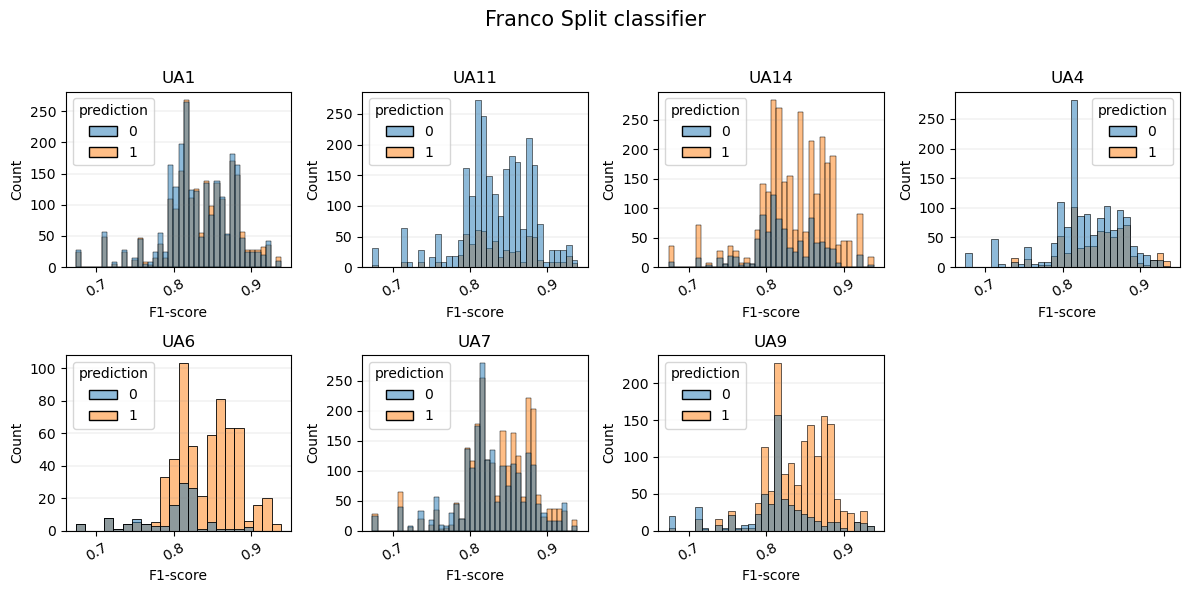

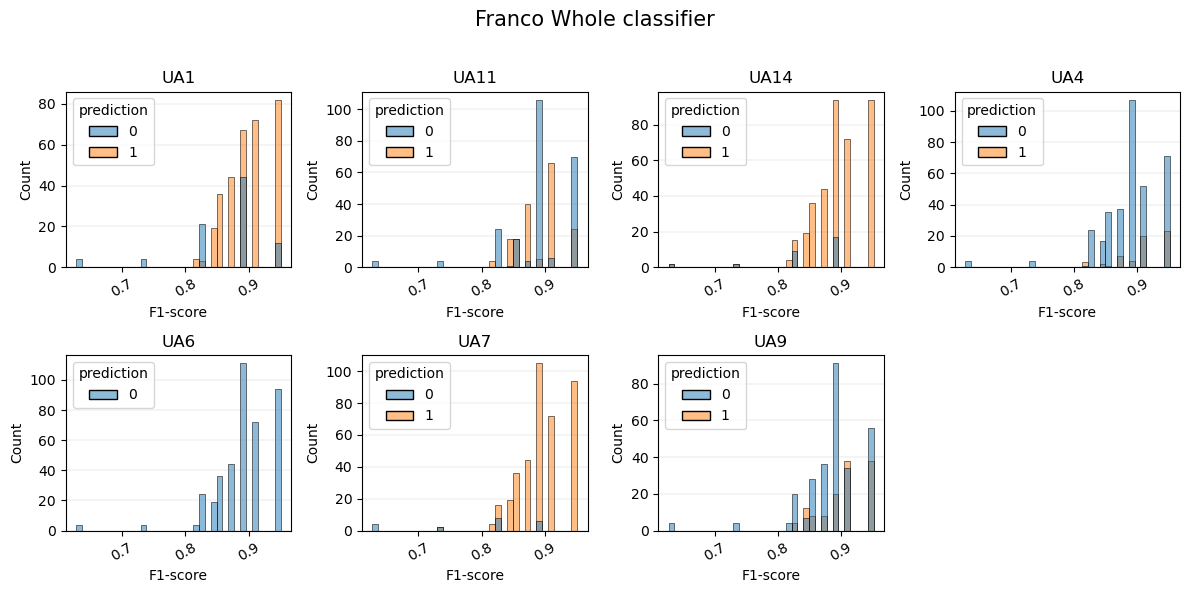

In [ ]:
for _author in pred_df.author.unique()[:-1]:
    make_figures(_author, pred_df, 'f1-score', 'prediction', 'Split')
    make_figures(_author, pred_df, 'f1-score', 'prediction', 'Whole')

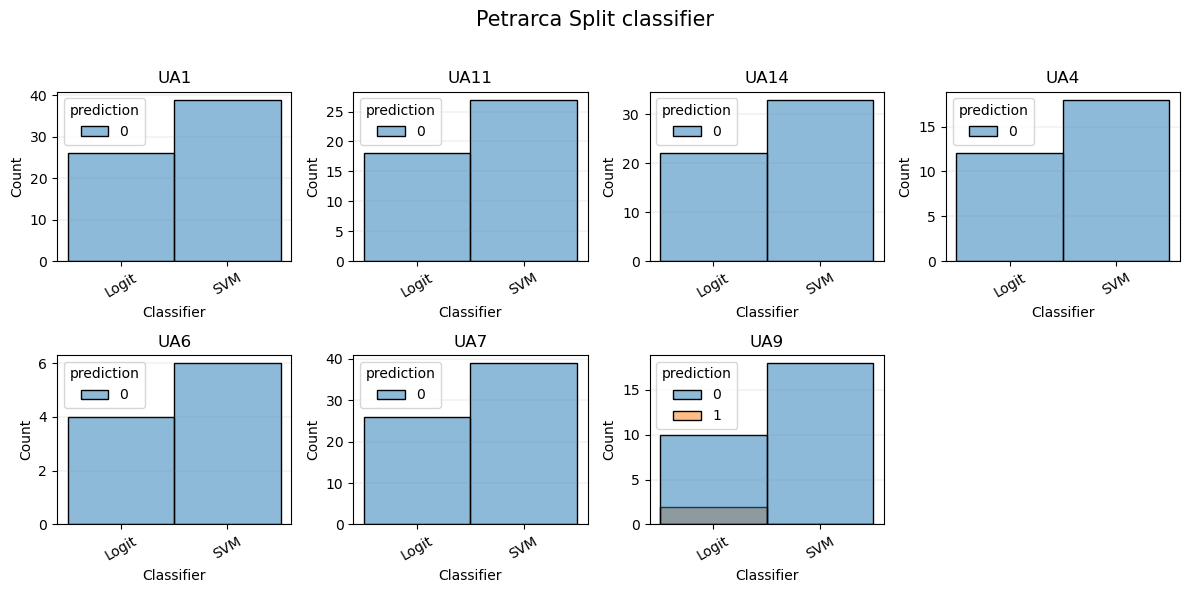

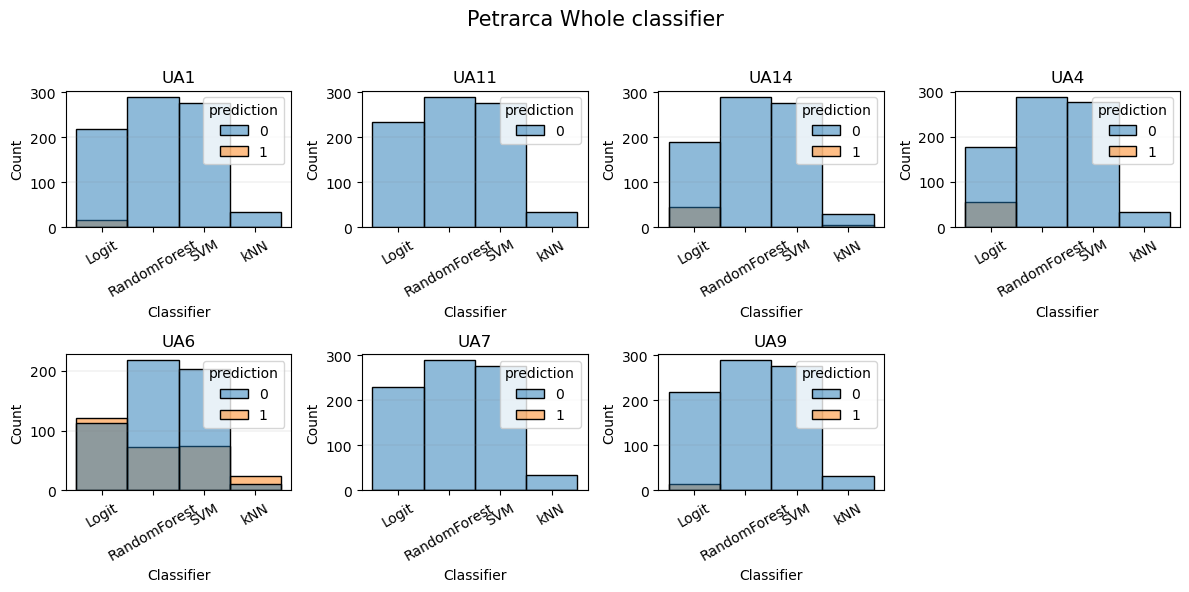

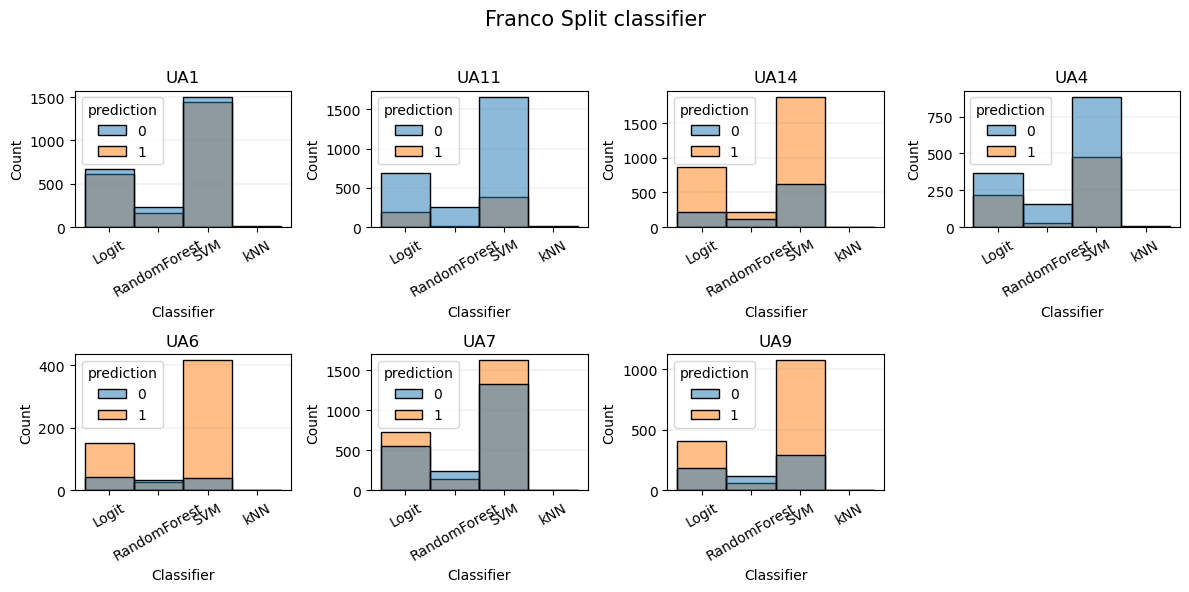

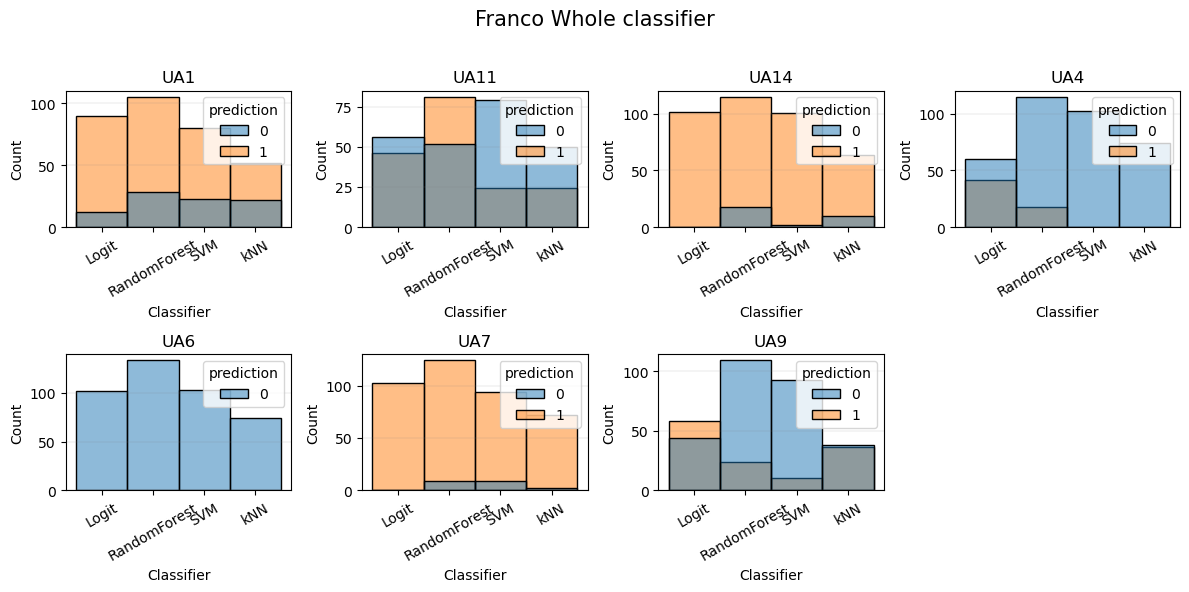

In [ ]:
for _author in pred_df.author.unique()[:-1]:
    make_figures(_author, pred_df, 'classifier', 'prediction', 'Split')
    make_figures(_author, pred_df, 'classifier', 'prediction', 'Whole')